In [2]:
# 1. LangChain Core 이해와 활용
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import ChatOpenAI

# 간단한 체인 구성
llm = ChatOpenAI(model="gpt-4o")
prompt = ChatPromptTemplate.from_template("너는 친절한 조교야. 질문: {question}")
chain = prompt | llm | StrOutputParser()

response = chain.invoke({"question": "LangChain Core란 무엇인가요?"})
print("💡 LangChain Core 응답:", response)


💡 LangChain Core 응답: LangChain Core는 자연어 처리(NLP) 애플리케이션을 구축하기 위한 프레임워크 중 하나로, 언어 모델을 보다 쉽게 활용할 수 있도록 다양한 도구와 인터페이스를 제공합니다. 이 프레임워크는 주로 파이썬(Python)으로 작성되어 있으며, 오픈 소스 프로젝트로 개발자와 연구자들이 자유롭게 사용할 수 있습니다.

LangChain Core의 주요 기능은 다음과 같습니다:

1. **모듈화된 구성 요소**: 텍스트를 생성하거나 분석하는 데 필요한 다양한 구성 요소들을 모듈화하여 제공함으로써 개발자들이 쉽게 조합하고 확장할 수 있도록 돕습니다.

2. **데이터 관리**: 대규모 언어 모델을 다룰 때 필요한 데이터 관리 및 전처리 기능들을 지원하여 데이터의 수집, 정리, 변환 과정을 단순화합니다.

3. **확장성**: 다양한 언어 모델과의 통합을 지원하여, 사용자가 최신 모델을 손쉽게 활용할 수 있습니다. 예를 들어 OpenAI의 GPT 시리즈나 다른 오픈 소스 언어 모델들을 통합하여 사용할 수 있습니다.

4. **협업 기능**: 개발자들이 함께 프로젝트를 진행할 수 있도록 하기 위해 강력한 협업 기능과 버전 관리 도구를 제공합니다.

이러한 기능들을 통해 LangChain Core는 자연어 처리 프로젝트를 보다 쉽게 시작하고 관리할 수 있도록 도와주며, 연구자 및 개발자들이 새로운 NLP 솔루션을 빠르게 프로토타입하고 배포할 수 있게 합니다.


In [4]:
%pip install faiss-cpu

   ---------------------------------------- 0.0/15.0 MB ? eta -:--:--
   ---------------- ----------------------- 6.3/15.0 MB 29.7 MB/s eta 0:00:01
   ---------------------------------- ----- 13.1/15.0 MB 30.4 MB/s eta 0:00:01
   ---------------------------------------  14.9/15.0 MB 29.4 MB/s eta 0:00:01
   ---------------------------------------  14.9/15.0 MB 29.4 MB/s eta 0:00:01
   ---------------------------------------  14.9/15.0 MB 29.4 MB/s eta 0:00:01
   ---------------------------------------- 15.0/15.0 MB 13.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
# 2. RAG 시스템 구축 (문서 → 벡터 DB → 검색 + 응답)

from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
from langchain.chains import RetrievalQA

# 2.1. 문서 수집 및 분할
docs = WebBaseLoader("https://lilianweng.github.io/posts/2023-06-23-agent/").load()
splits = RecursiveCharacterTextSplitter(chunk_size=800, chunk_overlap=100).split_documents(docs)

# 2.2. 임베딩 및 저장
vectorstore = FAISS.from_documents(splits, OpenAIEmbeddings())

# 2.3. RAG QA 체인 구성
qa = RetrievalQA.from_chain_type(llm=llm, retriever=vectorstore.as_retriever())
print("📘 RAG 응답:", qa.run("Autonomous Agent의 개념은?"))


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_37548\2569351329.py:18: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  print("📘 RAG 응답:", qa.run("Autonomous Agent의 개념은?"))


📘 RAG 응답: Autonomous Agent는 LLM (대형 언어 모델)을 주요 컨트롤러로 사용하는 시스템으로, 다양한 작업을 자동으로 수행할 수 있도록 설계된 에이전트입니다. 이러한 에이전트는 복잡한 실험의 설계, 계획 및 수행에서 인터넷 브라우징, 문서 읽기, 코드 실행, 로봇 실험 API 호출, 다른 LLM 활용까지 다양한 도구를 사용할 수 있습니다. Autonomous Agent는 사람의 개입 없이도 독립적으로 작업을 관리하며, 자연 언어 인터페이스를 통해 명령을 이해하고 실행합니다. 대표적인 예시로는 AutoGPT, GPT-Engineer, BabyAGI 등이 있습니다. 이러한 시스템은 문제 해결을 위한 강력한 도구로 간주되며, 다양한 실증 사례들이 이를 뒷받침합니다.


In [7]:
%pip install "langserve[all]"


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 6.5 MB/s eta 0:00:00


In [13]:
# 3. LangServ 이해와 활용 (LCEL 기반 서비스 구현)
# LangServ는 LangChain 기반 LLM API 서버 구성 도구
# 코드 예시는 CLI/서비스 수준 설정이므로 간단한 설명 포함

# LangServe 설치:
# pip install langserve

# 실제 API 서버 실행 파일: main.py
from fastapi import FastAPI
from langserve import add_routes

app = FastAPI()

# 체인 구성
chain = prompt | llm | StrOutputParser()

# LangServe에 체인 연결
add_routes(app, chain, path="/chat")

# 실행:
# !uvicorn main:app --reload

print("🌐 LangServ는 http://localhost:8000/chat 에서 응답 가능")


^C
🌐 LangServ는 http://localhost:8000/chat 에서 응답 가능


In [12]:
!uvicorn main:app --reload

^C


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------- ----------- 5.8/8.1 MB 32.0 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 14.8 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 14.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 9.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ------------------------ --------------- 6.6/10.7 MB 28.7 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 25.2 MB/s eta 0:00:01
   --------------------------------

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_37548\3201390705.py:42: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_37548\3201390705.py:42: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_37548\3201390705.py:42: UserWarning: Glyph 45937 (\N{HANGUL SYLLABLE DEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_37548\3201390705.py:42: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_37548\3201390705.py:42: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3754

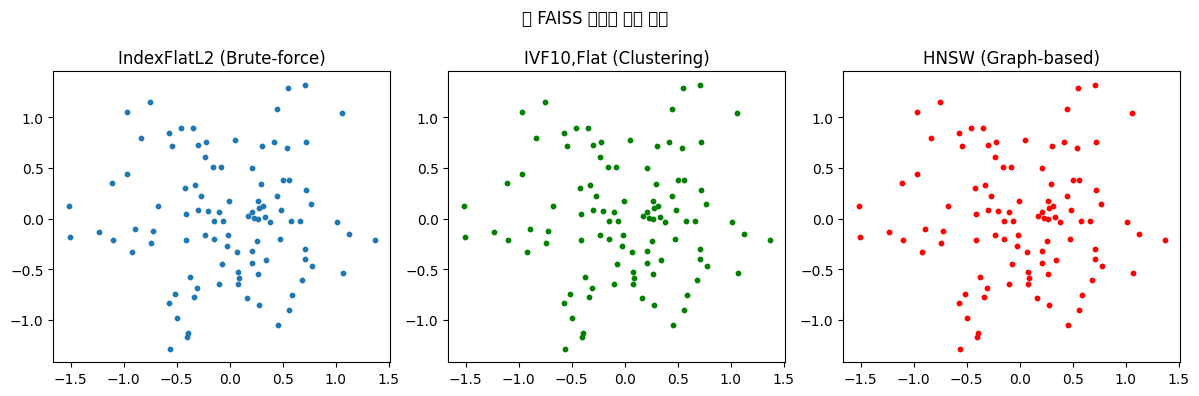

In [10]:
!pip install faiss-cpu matplotlib scikit-learn

import faiss
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. 데이터 생성
dim = 128
nb = 100
data = np.random.random((nb, dim)).astype('float32')

# 2. 인덱스 생성
index_flat = faiss.IndexFlatL2(dim)
index_ivf = faiss.index_factory(dim, "IVF10,Flat")
index_hnsw = faiss.IndexHNSWFlat(dim, 32)

index_ivf.train(data)
index_flat.add(data)
index_ivf.add(data)
index_hnsw.add(data)

# 3. 차원 축소
pca = PCA(n_components=2)
reduced = pca.fit_transform(data)

# 4. 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(reduced[:, 0], reduced[:, 1], s=10)
plt.title("IndexFlatL2 (Brute-force)")

plt.subplot(1, 3, 2)
plt.scatter(reduced[:, 0], reduced[:, 1], s=10, c='g')
plt.title("IVF10,Flat (Clustering)")

plt.subplot(1, 3, 3)
plt.scatter(reduced[:, 0], reduced[:, 1], s=10, c='r')
plt.title("HNSW (Graph-based)")

plt.suptitle("🔍 FAISS 인덱스 구조 비교")
plt.tight_layout()
plt.show()
